<a href="https://colab.research.google.com/github/amarie-51/projekt_NLP/blob/main/Fisrt_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [ ]:
import numpy as np


flattening the two spatial dimensions

In [ ]:
x_train = np.reshape(x_train, (60000,784))
x_test = np.reshape(x_test, (10000,784))
print(x_train.shape,x_test.shape)

(60000, 784) (10000, 784)


In [ ]:
x_train=(x_train/255)
x_test=(x_test/255)
print(x_train.shape,x_test.shape)

(60000, 784) (10000, 784)


In [ ]:
y_train=keras.utils.to_categorical(y_train, 10)
y_test=keras.utils.to_categorical(y_test, 10)


Creating a model

In [ ]:
keras.Sequential()

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 3s 6ms/step - loss: 0.3966 - accuracy: 0.8868 - val_loss: 0.3109 - val_accuracy: 0.9156
Epoch 2/12
375/375 [==============================] - 2s 6ms/step - loss: 0.3069 - accuracy: 0.9139 - val_loss: 0.2799 - val_accuracy: 0.9212
Epoch 3/12
375/375 [==============================] - 2s 6ms/step - loss: 0.2947 - accuracy: 0.9175 - val_loss: 0.2799 - val_accuracy: 0.9233
Epoch 4/12
375/375 [==============================] - 2s 6ms/step - loss: 0.2873 - accuracy: 0.9196 - val_loss: 0.2852 - val_accuracy: 0.9223
Epoch 5/12
375/375 [==============================] - 2s 6ms/step - loss: 0.2817 - accuracy: 0.9218 - val_loss: 0.2861 - val_accuracy: 0.9214
Epoch 6/12
375/375 [==============================] - 2s 6ms/step - loss: 0.2777 - accuracy: 0.9215 - val_loss: 0.2853 - val_accuracy: 0.9231
Epoch 7/12
375/375 [==============================] - 2s 6ms/step - loss: 0.2745 - accuracy: 0.9234 - val_loss: 0.2823 - val_accuracy: 0.9240
Epoch 

In [ ]:
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

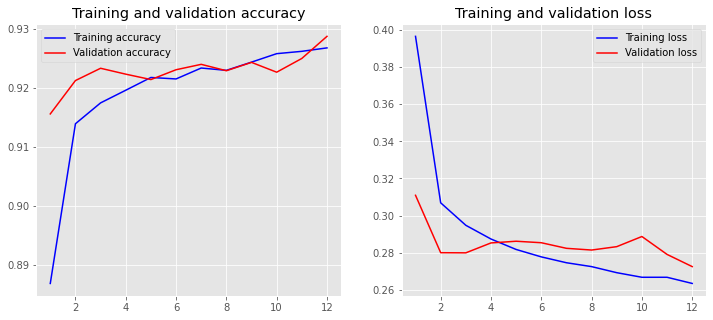

In [ ]:
plot_history(history)

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(loss, accuracy)

0.07421593368053436 0.9797999858856201
